In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import re
import string

In [4]:
df = pd.read_csv("C:\IMDB Dataset.csv")

print(df.head())
print(df['sentiment'].value_counts())

<>:1: SyntaxWarning: invalid escape sequence '\I'
<>:1: SyntaxWarning: invalid escape sequence '\I'
C:\Users\Sakshi Katiyar\AppData\Local\Temp\ipykernel_12504\1173977777.py:1: SyntaxWarning: invalid escape sequence '\I'
  df = pd.read_csv("C:\IMDB Dataset.csv")


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [5]:
def clean_text(text):
    text = text.lower()                            
    text = re.sub(r"<.*?>", "", text)               
    text = re.sub(r"http\S+|www\S+", "", text)     
    text = text.translate(str.maketrans("", "", string.punctuation)) 
    text = re.sub(r"\d+", "", text)                 
    text = text.strip()
    return text

df['review_clean'] = df['review'].apply(clean_text)

df['label'] = df['sentiment'].map({'positive': 1, 'negative': 0})

X_train, X_test, y_train, y_test = train_test_split(
    df['review_clean'], df['label'], test_size=0.2, random_state=42, stratify=df['label']
)

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("Shape of TF-IDF matrix:", X_train_tfidf.shape)

Shape of TF-IDF matrix: (40000, 5000)


In [6]:
model = LogisticRegression(max_iter=200)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8864

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89      5000
           1       0.88      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



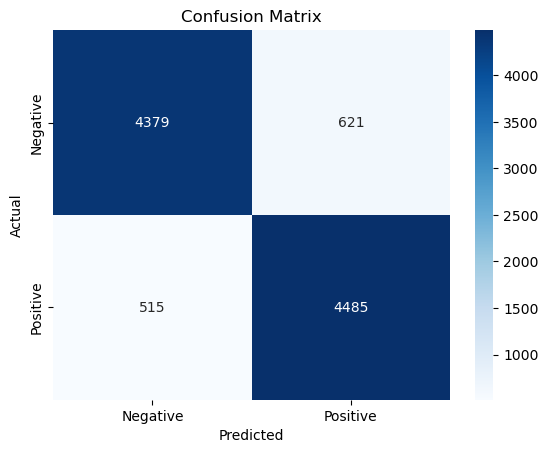

In [7]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [8]:
sample_reviews = [
    "This movie was fantastic! The actors did a great job.",
    "I hated this film. It was boring and too long."
]

sample_clean = [clean_text(r) for r in sample_reviews]
sample_vec = vectorizer.transform(sample_clean)
preds = model.predict(sample_vec)

for rev, pred in zip(sample_reviews, preds):
    print(f"Review: {rev} --> Sentiment: {'Positive' if pred==1 else 'Negative'}")

Review: This movie was fantastic! The actors did a great job. --> Sentiment: Positive
Review: I hated this film. It was boring and too long. --> Sentiment: Negative
